<a href="https://colab.research.google.com/github/constantinembufung/iDOTA/blob/main/iDOTA_eye_disease_detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*IDOTA * is AI-based retinal screening application that is developed at the Douala School of AI Research Lab(DSAIRLab) to easily diagnose and prevent blindness in Cameroon. In this notebook we are going to train our model

In [40]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image

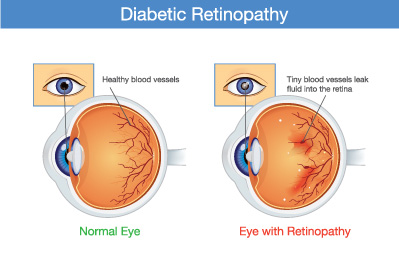

In [11]:
myimage = load_img('drive/MyDrive/Colab Notebooks/iDOTA/diabetik-retina-tedavisi-1.jpg')
myimage

The most common cause of blindness due to diabetes is “Diabetic Retinopathy”. Diabetes affects the nerve layer (retina or net layer) of the eye and the capillaries in this layer, disrupting its work and causing vision loss. Retinal disorders due to diabetes are called diabetic retinopathy.

**BASIC DATA ANALYSIS**

In [14]:
#load the dataset using pandas 
df_train=pd.read_csv("drive/MyDrive/Colab Notebooks/iDOTA/train.csv")
df_test=pd.read_csv("drive/MyDrive/Colab Notebooks/iDOTA/test.csv")

In [13]:
df_train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [15]:
x=df_train["id_code"]
y=df_train["diagnosis"]

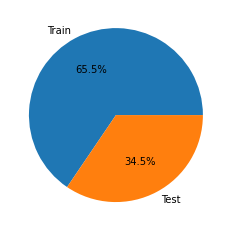

In [19]:
#let observe the distribution of the dataset 
labels=["Train","Test"]
sizes=[len(df_train),len(df_test)]

plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.show()

**DATA Separation using sklearn**

In [22]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42)
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (3112,)
x_test shape:  (550,)
y_train shape:  (3112,)
y_test shape:  (550,)


*Train,test datat distribution*

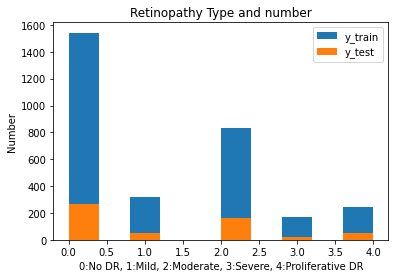

In [23]:
plt.hist(y_train,label="y_train")
plt.hist(y_test,label="y_test")
plt.title("Retinopathy Type and number")
plt.xlabel("0:No DR, 1:Mild, 2:Moderate, 3:Severe, 4:Proliferative DR")
plt.ylabel("Number")
plt.legend()
plt.show()

In [42]:
"""%%time
IMG_SIZE = 512
fig = plt.figure(figsize=(25, 16))
# display 10 images from each class
for i in sorted(y_train.unique()):
    for j, (idx, row) in enumerate(df_train.loc[df_train['diagnosis'] == i].sample(5, random_state=42).iterrows()):
        ax = fig.add_subplot(5, 5, i * 5 + j + 1, xticks=[], yticks=[])
        path=f"drive/MyDrive/Colab Notebooks/iDOTA/train_images/{row['id_code']}.png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        plt.imshow(image)
        ax.set_title('Label: %d-%d-%s' % (i, idx, row['id_code']) )"""

'%%time\nIMG_SIZE = 512\nfig = plt.figure(figsize=(25, 16))\n# display 10 images from each class\nfor i in sorted(y_train.unique()):\n    for j, (idx, row) in enumerate(df_train.loc[df_train[\'diagnosis\'] == i].sample(5, random_state=42).iterrows()):\n        ax = fig.add_subplot(5, 5, i * 5 + j + 1, xticks=[], yticks=[])\n        path=f"drive/MyDrive/Colab Notebooks/iDOTA/train_images/{row[\'id_code\']}.png"\n        image = cv2.imread(path)\n        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)\n        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))\n        plt.imshow(image)\n        ax.set_title(\'Label: %d-%d-%s\' % (i, idx, row[\'id_code\']) )'

In [37]:
from glob import glob
import random

multipleImages = glob('drive/MyDrive/Colab Notebooks/iDOTA/train_images/**')
def plotImages2():
    r = random.sample(multipleImages, 9)
    plt.figure(figsize=(20,20))
    plt.subplot(331)
    plt.imshow(cv2.imread(r[0])); plt.axis('off')
    plt.subplot(332)
    plt.imshow(cv2.imread(r[1])); plt.axis('off')
    plt.subplot(333)
    plt.imshow(cv2.imread(r[2])); plt.axis('off')
    plt.subplot(334)
    plt.imshow(cv2.imread(r[3])); plt.axis('off')
    plt.subplot(335)
    plt.imshow(cv2.imread(r[4])); plt.axis('off')
    plt.subplot(336)
    plt.imshow(cv2.imread(r[5])); plt.axis('off')
    plt.subplot(337)
    plt.imshow(cv2.imread(r[6])); plt.axis('off')
    plt.subplot(338)
    plt.imshow(cv2.imread(r[7])); plt.axis('off')
    plt.subplot(339)
    plt.imshow(cv2.imread(r[8])); plt.axis('off')

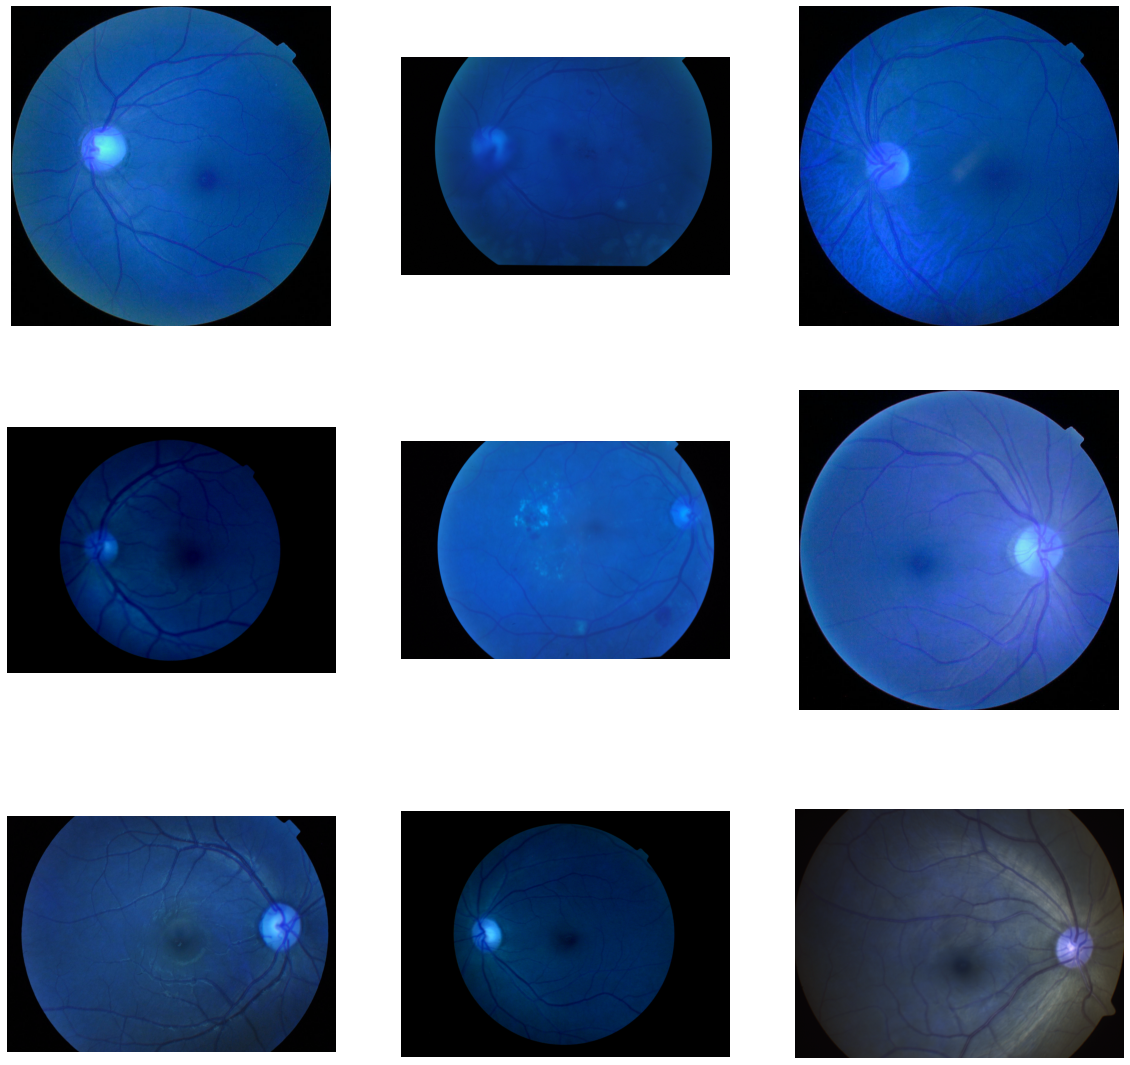

In [38]:
plotImages2()

In [44]:
patient=train[train["diagnosis"]==4]
healt=train[train["diagnosis"]==0]
train_df=pd.concat([patient,healt])

In [45]:
train_df["diagnosis"]=[1 if i==4 else 0 for i in train_df.diagnosis]

In [46]:
train_df.shape

(2100, 2)

In [47]:
x=train_df.drop(columns=["diagnosis"])
y=train_df.diagnosis

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)